# Highest wicket taking bowler

In [39]:
%config IPCompleter.greedy=True

In [40]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd

In [41]:
cricket = pd.read_excel('C:/Users/g7x0302/Desktop/Excel/Cricket Challenge/Master Data.xlsx')
cricket.head()

,S.N.,Player,M,Inn,B,Runs,Wkts,BBI,BBM,Econ,Avg,SR,5W,10W
0,1,Rohit Sharma,201,38,593,515,8,2019-02-27 00:00:00,2019-02-27 00:00:00,5.21,64.38,74.12,0,0
1,2,Sikhar Dhawan,0,0,0,0,0,0,0,0.00,0.00,0.00,0,0
2,3,Virat Kohli,222,48,641,665,4,2019-01-15 00:00:00,2019-01-15 00:00:00,6.22,166.25,160.25,0,0
3,4,Ambati Rayudu,52,9,121,124,3,2019-01-05 00:00:00,2019-01-05 00:00:00,6.15,41.33,40.33,0,0
4,5,Lokesh Rahul,0,0,0,0,0,0,0,0.00,0.00,0.00,0,0


In [42]:
cricket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 14 columns):
S.N.      31 non-null int64
Player    31 non-null object
M         31 non-null int64
Inn       31 non-null int64
B         31 non-null int64
Runs      31 non-null int64
Wkts      31 non-null int64
BBI       31 non-null object
BBM       31 non-null object
Econ      31 non-null float64
Avg       31 non-null float64
SR        31 non-null float64
5W        31 non-null int64
10W       31 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 3.5+ KB


In [43]:
cricket.describe()

,S.N.,M,Inn,B,Runs,Wkts,Econ,Avg,SR,5W,10W
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.0
mean,8.548387,49.645161,22.161290,910.580645,788.741935,25.483871,4.071935,27.508065,30.320323,0.193548,0.0
std,4.925029,76.665746,25.271983,1170.657672,996.233439,34.169061,2.547267,32.217877,32.704550,0.477448,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,4.500000,1.000000,1.000000,18.000000,15.500000,0.000000,2.225000,0.000000,0.000000,0.000000,0.0
50%,8.000000,22.000000,14.000000,402.000000,383.000000,4.000000,4.990000,26.610000,29.760000,0.000000,0.0
75%,13.000000,53.000000,38.500000,1792.000000,1586.000000,43.000000,5.510000,36.790000,40.285000,0.000000,0.0
max,17.000000,338.000000,102.000000,4925.000000,4094.000000,114.000000,8.430000,166.250000,160.250000,2.000000,0.0


In [44]:
cricket.shape

(31, 14)

From india Team Sidharth Kaul has not taken because he has less experience in ODI so unable to collect data

In [45]:
df=cricket[['Player','SR','Avg']]
df.shape

(31, 3)

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
numeric_df= df.copy()
s_scalar=StandardScaler(copy=True)
numeric_df[['SR','Avg']]=s_scalar.fit_transform(numeric_df[['SR','Avg']])
numeric_df

,Player,SR,Avg
0,Rohit Sharma,1.361391,1.163374
1,Sikhar Dhawan,-0.942423,-0.867927
2,Virat Kohli,4.038503,4.377549
3,Ambati Rayudu,0.311123,0.436106
4,Lokesh Rahul,-0.942423,-0.867927
5,Rishab Pant,-0.942423,-0.867927
6,MS dhoni,0.176537,0.110177
7,Kedar Jadhav,0.242431,0.127846
8,Hardik pandya,0.395667,0.385623
9,Vijay Sankar,-0.942423,-0.867927


In [47]:
kmeans = KMeans(n_clusters=6,random_state=100).fit(numeric_df[['SR','Avg']])

In [48]:
kmeans.labels_

array([3, 4, 1, 2, 4, 4, 5, 5, 2, 4, 5, 5, 5, 5, 2, 3, 4, 4, 4, 4, 4, 4,
       2, 5, 0, 5, 5, 5, 5, 2, 2])

In [49]:
cricket_cluster = pd.concat([numeric_df, pd.Series(kmeans.labels_)], axis=1)

In [50]:
cricket_cluster.rename(columns={0:'cluster_id'},inplace=True)

In [51]:
cricket_cluster[cricket_cluster['cluster_id']==0]

,Player,SR,Avg,cluster_id
24,Ashton Turner,-0.569436,-0.426203,0


In [52]:
cricket_cluster[cricket_cluster['cluster_id']==1]

,Player,SR,Avg,cluster_id
2,Virat Kohli,4.038503,4.377549,1


In [53]:
cricket_cluster[cricket_cluster['cluster_id']==2]

,Player,SR,Avg,cluster_id
3,Ambati Rayudu,0.311123,0.436106,2
8,Hardik pandya,0.395667,0.385623,2
14,Bhuvneshwar Kumar,0.400329,0.265096,2
22,Glenn Maxwell,0.422397,0.425063,2
29,Nathan Lyon,0.684110,0.483434,2
30,Adam Zampa,0.308326,0.320627,2


In [54]:
cricket_cluster[cricket_cluster['cluster_id']==3]

,Player,SR,Avg,cluster_id
0,Rohit Sharma,1.361391,1.163374,3
15,Aron Finch,1.513072,1.293367,3


In [55]:
cricket_cluster[cricket_cluster['cluster_id']==4]

,Player,SR,Avg,cluster_id
1,Sikhar Dhawan,-0.942423,-0.867927,4
4,Lokesh Rahul,-0.942423,-0.867927,4
5,Rishab Pant,-0.942423,-0.867927,4
9,Vijay Sankar,-0.942423,-0.867927,4
16,Alex Carey,-0.942423,-0.867927,4
17,Usman Khawaja,-0.942423,-0.867927,4
18,Shaun Marsh,-0.942423,-0.867927,4
19,D Arcy Short,-0.942423,-0.867927,4
20,Peter Handscomb,-0.942423,-0.867927,4
21,Marcus Stoinis,-0.942423,-0.867927,4


In [56]:
cricket_cluster[cricket_cluster['cluster_id']==5]

,Player,SR,Avg,cluster_id
6,MS dhoni,0.176537,0.110177,5
7,Kedar Jadhav,0.242431,0.127846,5
10,Kuldeep Yadav,-0.135839,-0.216384,5
11,Mohmmed Shami,-0.079891,-0.068091,5
12,Jasprit Bumrah,-0.060931,-0.205025,5
13,Yuzevendra Chahal,-0.017416,-0.116049,5
23,Jhye Richardson,0.018639,0.061587,5
25,Pat Cummins,0.101940,0.070421,5
26,Kane Richardson,0.133954,0.130054,5
27,Nathan Coulter-Nile,-0.018038,-0.028335,5


C:\Users\g7x0302\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


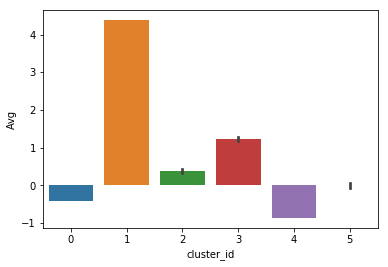

In [57]:
%matplotlib inline
sns.barplot(x=cricket_cluster.cluster_id, y=cricket_cluster.Avg)

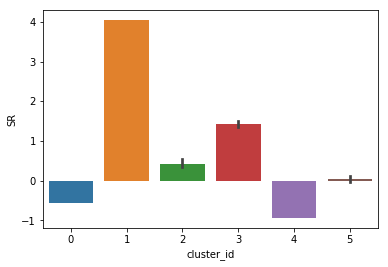

In [58]:
sns.barplot(x=cricket_cluster.cluster_id, y=cricket_cluster.SR)

In [59]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
import matplotlib.pyplot as plt

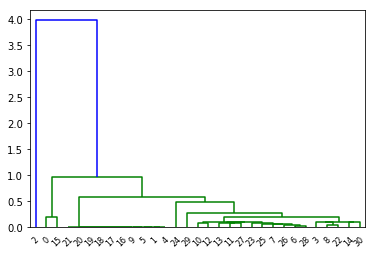

In [60]:
mergings = linkage(numeric_df[['SR','Avg']], method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

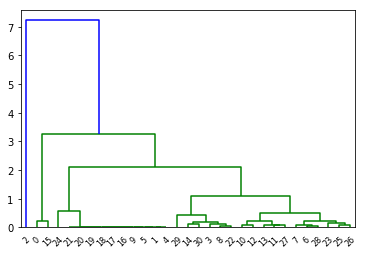

In [61]:
mergings = linkage(numeric_df[['SR','Avg']], method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [62]:
clusterCut_TT = pd.Series(cut_tree(mergings, n_clusters = 6).reshape(-1,))
cricket_cluster_cut = pd.concat([numeric_df, clusterCut_TT], axis=1)
#RFM_hc.columns = ['CustomerID', 'Frequency', 'Amount', 'Recency', 'ClusterID']
print("0 :",cricket_cluster_cut[cricket_cluster_cut[0]==0].SR.mean())
print("1 :",cricket_cluster_cut[cricket_cluster_cut[0]==1].SR.mean())
print("2 :",cricket_cluster_cut[cricket_cluster_cut[0]==2].SR.mean())
print("3 :",cricket_cluster_cut[cricket_cluster_cut[0]==3].SR.mean())
print("3 :",cricket_cluster_cut[cricket_cluster_cut[0]==4].SR.mean())
print("3 :",cricket_cluster_cut[cricket_cluster_cut[0]==5].SR.mean())

0 : 1.4372318475943728
1 : -0.9424229509005528
2 : 4.0385028779763
3 : 0.4203252015116623
3 : 0.05079527564899416
3 : -0.5694363053684326


In [63]:
cricket_cluster_cut[cricket_cluster_cut[0]==0]

,Player,SR,Avg,0
0,Rohit Sharma,1.361391,1.163374,0
15,Aron Finch,1.513072,1.293367,0


In [64]:
cricket_cluster_cut[cricket_cluster_cut[0]==1]

,Player,SR,Avg,0
1,Sikhar Dhawan,-0.942423,-0.867927,1
4,Lokesh Rahul,-0.942423,-0.867927,1
5,Rishab Pant,-0.942423,-0.867927,1
9,Vijay Sankar,-0.942423,-0.867927,1
16,Alex Carey,-0.942423,-0.867927,1
17,Usman Khawaja,-0.942423,-0.867927,1
18,Shaun Marsh,-0.942423,-0.867927,1
19,D Arcy Short,-0.942423,-0.867927,1
20,Peter Handscomb,-0.942423,-0.867927,1
21,Marcus Stoinis,-0.942423,-0.867927,1


In [65]:
cricket_cluster_cut[cricket_cluster_cut[0]==2]

,Player,SR,Avg,0
2,Virat Kohli,4.038503,4.377549,2


In [66]:
cricket_cluster_cut[cricket_cluster_cut[0]==3]

,Player,SR,Avg,0
3,Ambati Rayudu,0.311123,0.436106,3
8,Hardik pandya,0.395667,0.385623,3
14,Bhuvneshwar Kumar,0.400329,0.265096,3
22,Glenn Maxwell,0.422397,0.425063,3
29,Nathan Lyon,0.684110,0.483434,3
30,Adam Zampa,0.308326,0.320627,3


In [67]:
cricket_cluster_cut[cricket_cluster_cut[0]==4]

,Player,SR,Avg,0
6,MS dhoni,0.176537,0.110177,4
7,Kedar Jadhav,0.242431,0.127846,4
10,Kuldeep Yadav,-0.135839,-0.216384,4
11,Mohmmed Shami,-0.079891,-0.068091,4
12,Jasprit Bumrah,-0.060931,-0.205025,4
13,Yuzevendra Chahal,-0.017416,-0.116049,4
23,Jhye Richardson,0.018639,0.061587,4
25,Pat Cummins,0.101940,0.070421,4
26,Kane Richardson,0.133954,0.130054,4
27,Nathan Coulter-Nile,-0.018038,-0.028335,4


In [68]:
cricket_cluster_cut[cricket_cluster_cut[0]==5]

,Player,SR,Avg,0
24,Ashton Turner,-0.569436,-0.426203,5


In [69]:
clusterCut_t = cut_tree(mergings, n_clusters = 6)

In [70]:
ClusterID=pd.Series(clusterCut_t.reshape(-1,))
cricket_cluster_merge = pd.concat([numeric_df, ClusterID], axis=1)

In [71]:
print(len(cricket_cluster_cut[cricket_cluster_cut[0]==0]))
print(len(cricket_cluster_cut[cricket_cluster_cut[0]==1]))
print(len(cricket_cluster_cut[cricket_cluster_cut[0]==2]))
print(len(cricket_cluster_cut[cricket_cluster_cut[0]==3]))
print(len(cricket_cluster_cut[cricket_cluster_cut[0]==4]))
print(len(cricket_cluster_cut[cricket_cluster_cut[0]==5]))

2
10
1
6
11
1


# As we can see that cluster 5 says highest wicket taking bowler belong to them.

# Nathan Coulter-Nile is the closest to Lowest average who can take highest wicket in this series